In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
pd.set_option('display.max_columns',None)



from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(15,5)
%config InlineBackend.figure_format = 'png'
%matplotlib inline

Грузим данные 

In [6]:
df_march = pd.read_csv('./data/2_march.csv', sep=';')
df_apr = pd.read_csv('./data/2_april.csv', sep=';')
df_may = pd.read_csv('./data/2_may.csv', sep=';')
df_febr = pd.read_csv('./data/2_febr.csv', sep=';')
df_checks  = pd.concat([df_febr , df_march, df_apr, df_may], axis=0)

df_shops = pd.read_csv('./data/svao_info.csv', sep=';')
df_points = pd.read_csv('./data/projects for TT.csv', sep=';')
df_left = pd.read_csv('./data/2_ost.csv', sep=';')

Выделяем признаки 

In [7]:
date = pd.to_datetime(df_checks['date_ch'])
df_checks['day'] = date.dt.day
df_checks['year'] = date.dt.year
df_checks['month'] = date.dt.month
df_checks['week'] = date.dt.week
df_checks['day_of_week'] = date.dt.day_name()

df_checks['hour'] = df_checks['time_ch'].apply(lambda x: x.split(':')[0]).astype(int)
df_checks['time'] = df_checks['time_ch'].apply(lambda x: x.split(':')[1]).astype(int)

C:\Users\Ivan\AppData\Local\Temp\ipykernel_5648\315077176.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_checks['week'] = date.dt.week


Выделяем плохие и хорошие магазины на основе изменения продаж за 3 месяца 

In [8]:
df_pivot_table = df_checks.pivot_table(columns=['week'], index=['id_tt_cl'], values = ['BaseSum']).pct_change(axis=1)

In [9]:
df_pivot_table.head()

BaseSum                                                              \
week          5         6         7         8         9         10        11   
id_tt_cl                                                                       
10864        NaN  0.005108  0.000018 -0.001489  0.019190  0.017872  0.000256   
11127        NaN -0.006546  0.004877  0.024775  0.028024 -0.002031 -0.005885   
11128        NaN -0.002241  0.002537  0.003710  0.041889  0.002530  0.001877   
11160        NaN  0.017199  0.002396  0.008701  0.003806  0.029552 -0.018033   
11178        NaN -0.007960  0.004198  0.013023  0.035940  0.015951 -0.024142   

                                                                      \
week            12        13        14        15        16        17   
id_tt_cl                                                               
10864    -0.015292 -0.002351  0.005927  0.012029  0.022558 -0.010903   
11127    -0.016551 -0.004245  0.018657  0.009407  0.026118 -0.012767   
11128    -0.037698  0.012988  0.016152  0.000699  0.019833  0.005508   
11160    -0.016237  0.003654 -0.005060  0.013516  0.025724 -0.019745   
11178    -0.010414 -0.005892  0.011841  0.011055  0.018799 -0.002632   

                                                            
week            18        19        20        21        22  
id_tt_cl                                                    
10864     0.002170  0.004638  0.021667 -0.003820 -0.029564  
11127    -0.002702 -0.002027  0.026917 -0.002908 -0.016695  
11128     0.000410  0.000257  0.009886  0.019825 -0.052596  
11160     0.028029 -0.003976 -0.002001  0.005765 -0.015736  
11178     0.016031 -0.010992  0.035684 -0.009477 -0.031027

In [10]:
df_pivot_table_2 = df_pivot_table.copy()

In [11]:
for column in df_pivot_table_2:
    df_pivot_table_2[column] = df_pivot_table_2[column].median()

In [12]:
df_pivot_table_2.head()

BaseSum                                                              \
week          5         6         7         8         9         10        11   
id_tt_cl                                                                       
10864        NaN -0.003369  0.004877  0.006647  0.026103  0.017872 -0.023583   
11127        NaN -0.003369  0.004877  0.006647  0.026103  0.017872 -0.023583   
11128        NaN -0.003369  0.004877  0.006647  0.026103  0.017872 -0.023583   
11160        NaN -0.003369  0.004877  0.006647  0.026103  0.017872 -0.023583   
11178        NaN -0.003369  0.004877  0.006647  0.026103  0.017872 -0.023583   

                                                                      \
week            12        13        14        15        16        17   
id_tt_cl                                                               
10864    -0.007363  0.002497  0.005901  0.009561  0.031429 -0.011048   
11127    -0.007363  0.002497  0.005901  0.009561  0.031429 -0.011048   
11128    -0.007363  0.002497  0.005901  0.009561  0.031429 -0.011048   
11160    -0.007363  0.002497  0.005901  0.009561  0.031429 -0.011048   
11178    -0.007363  0.002497  0.005901  0.009561  0.031429 -0.011048   

                                                            
week            18        19        20        21        22  
id_tt_cl                                                    
10864    -0.002702  0.009261  0.007301  0.001828 -0.019607  
11127    -0.002702  0.009261  0.007301  0.001828 -0.019607  
11128    -0.002702  0.009261  0.007301  0.001828 -0.019607  
11160    -0.002702  0.009261  0.007301  0.001828 -0.019607  
11178    -0.002702  0.009261  0.007301  0.001828 -0.019607

In [13]:

df_pivot_table.head()

BaseSum                                                              \
week          5         6         7         8         9         10        11   
id_tt_cl                                                                       
10864        NaN  0.005108  0.000018 -0.001489  0.019190  0.017872  0.000256   
11127        NaN -0.006546  0.004877  0.024775  0.028024 -0.002031 -0.005885   
11128        NaN -0.002241  0.002537  0.003710  0.041889  0.002530  0.001877   
11160        NaN  0.017199  0.002396  0.008701  0.003806  0.029552 -0.018033   
11178        NaN -0.007960  0.004198  0.013023  0.035940  0.015951 -0.024142   

                                                                      \
week            12        13        14        15        16        17   
id_tt_cl                                                               
10864    -0.015292 -0.002351  0.005927  0.012029  0.022558 -0.010903   
11127    -0.016551 -0.004245  0.018657  0.009407  0.026118 -0.012767   
11128    -0.037698  0.012988  0.016152  0.000699  0.019833  0.005508   
11160    -0.016237  0.003654 -0.005060  0.013516  0.025724 -0.019745   
11178    -0.010414 -0.005892  0.011841  0.011055  0.018799 -0.002632   

                                                            
week            18        19        20        21        22  
id_tt_cl                                                    
10864     0.002170  0.004638  0.021667 -0.003820 -0.029564  
11127    -0.002702 -0.002027  0.026917 -0.002908 -0.016695  
11128     0.000410  0.000257  0.009886  0.019825 -0.052596  
11160     0.028029 -0.003976 -0.002001  0.005765 -0.015736  
11178     0.016031 -0.010992  0.035684 -0.009477 -0.031027

In [14]:
df_pivot_table_3 = df_pivot_table_2 - df_pivot_table

In [15]:
df_pivot_table_3.head()

BaseSum                                                              \
week          5         6         7         8         9         10        11   
id_tt_cl                                                                       
10864        NaN -0.008477  0.004859  0.008136  0.006914  0.000000 -0.023840   
11127        NaN  0.003177  0.000000 -0.018128 -0.001921  0.019903 -0.017699   
11128        NaN -0.001128  0.002340  0.002937 -0.015786  0.015341 -0.025461   
11160        NaN -0.020568  0.002482 -0.002054  0.022298 -0.011681 -0.005551   
11178        NaN  0.004591  0.000680 -0.006376 -0.009837  0.001921  0.000559   

                                                                      \
week            12        13        14        15        16        17   
id_tt_cl                                                               
10864     0.007929  0.004849 -0.000026 -0.002468  0.008871 -0.000146   
11127     0.009188  0.006742 -0.012755  0.000155  0.005311  0.001718   
11128     0.030335 -0.010491 -0.010251  0.008862  0.011596 -0.016557   
11160     0.008874 -0.001157  0.010961 -0.003955  0.005705  0.008697   
11178     0.003051  0.008389 -0.005939 -0.001494  0.012630 -0.008416   

                                                            
week            18        19        20        21        22  
id_tt_cl                                                    
10864    -0.004871  0.004623 -0.014366  0.005648  0.009958  
11127     0.000000  0.011288 -0.019616  0.004736 -0.002911  
11128    -0.003111  0.009004 -0.002585 -0.017997  0.032990  
11160    -0.030731  0.013237  0.009302 -0.003937 -0.003871  
11178    -0.018733  0.020254 -0.028383  0.011305  0.011421

In [16]:
df_pivot_table_4 = df_pivot_table_3.copy()

In [17]:
df_pivot_table_4.head()

BaseSum                                                              \
week          5         6         7         8         9         10        11   
id_tt_cl                                                                       
10864        NaN -0.008477  0.004859  0.008136  0.006914  0.000000 -0.023840   
11127        NaN  0.003177  0.000000 -0.018128 -0.001921  0.019903 -0.017699   
11128        NaN -0.001128  0.002340  0.002937 -0.015786  0.015341 -0.025461   
11160        NaN -0.020568  0.002482 -0.002054  0.022298 -0.011681 -0.005551   
11178        NaN  0.004591  0.000680 -0.006376 -0.009837  0.001921  0.000559   

                                                                      \
week            12        13        14        15        16        17   
id_tt_cl                                                               
10864     0.007929  0.004849 -0.000026 -0.002468  0.008871 -0.000146   
11127     0.009188  0.006742 -0.012755  0.000155  0.005311  0.001718   
11128     0.030335 -0.010491 -0.010251  0.008862  0.011596 -0.016557   
11160     0.008874 -0.001157  0.010961 -0.003955  0.005705  0.008697   
11178     0.003051  0.008389 -0.005939 -0.001494  0.012630 -0.008416   

                                                            
week            18        19        20        21        22  
id_tt_cl                                                    
10864    -0.004871  0.004623 -0.014366  0.005648  0.009958  
11127     0.000000  0.011288 -0.019616  0.004736 -0.002911  
11128    -0.003111  0.009004 -0.002585 -0.017997  0.032990  
11160    -0.030731  0.013237  0.009302 -0.003937 -0.003871  
11178    -0.018733  0.020254 -0.028383  0.011305  0.011421

In [18]:
for column in df_pivot_table_4:
    if column[1]>6:
        pre_column = (column[0],column[1]-1)
        print(column ,'--',pre_column )
        df_pivot_table_4[column] = df_pivot_table_4[column] + df_pivot_table_4[pre_column]

('BaseSum', 7) -- ('BaseSum', 6)
('BaseSum', 8) -- ('BaseSum', 7)
('BaseSum', 9) -- ('BaseSum', 8)
('BaseSum', 10) -- ('BaseSum', 9)
('BaseSum', 11) -- ('BaseSum', 10)
('BaseSum', 12) -- ('BaseSum', 11)
('BaseSum', 13) -- ('BaseSum', 12)
('BaseSum', 14) -- ('BaseSum', 13)
('BaseSum', 15) -- ('BaseSum', 14)
('BaseSum', 16) -- ('BaseSum', 15)
('BaseSum', 17) -- ('BaseSum', 16)
('BaseSum', 18) -- ('BaseSum', 17)
('BaseSum', 19) -- ('BaseSum', 18)
('BaseSum', 20) -- ('BaseSum', 19)
('BaseSum', 21) -- ('BaseSum', 20)
('BaseSum', 22) -- ('BaseSum', 21)


In [19]:
df_pivot_table_4.head()

BaseSum                                                              \
week          5         6         7         8         9         10        11   
id_tt_cl                                                                       
10864        NaN -0.008477 -0.003617  0.004519  0.011433  0.011433 -0.012407   
11127        NaN  0.003177  0.003177 -0.014951 -0.016871  0.003031 -0.014667   
11128        NaN -0.001128  0.001212  0.004149 -0.011637  0.003705 -0.021756   
11160        NaN -0.020568 -0.018087 -0.020141  0.002157 -0.009524 -0.015074   
11178        NaN  0.004591  0.005271 -0.001106 -0.010942 -0.009021 -0.008462   

                                                                      \
week            12        13        14        15        16        17   
id_tt_cl                                                               
10864    -0.004478  0.000371  0.000345 -0.002123  0.006748  0.006602   
11127    -0.005479  0.001263 -0.011493 -0.011338 -0.006027 -0.004309   
11128     0.008579 -0.001912 -0.012162 -0.003300  0.008295 -0.008261   
11160    -0.006201 -0.007358  0.003604 -0.000351  0.005353  0.014050   
11178    -0.005411  0.002978 -0.002961 -0.004455  0.008175 -0.000241   

                                                            
week            18        19        20        21        22  
id_tt_cl                                                    
10864     0.001731  0.006354 -0.008012 -0.002365  0.007593  
11127    -0.004309  0.006979 -0.012637 -0.007901 -0.010812  
11128    -0.011373 -0.002368 -0.004953 -0.022950  0.010040  
11160    -0.016681 -0.003444  0.005858  0.001922 -0.001949  
11178    -0.018974  0.001280 -0.027103 -0.015798 -0.004377

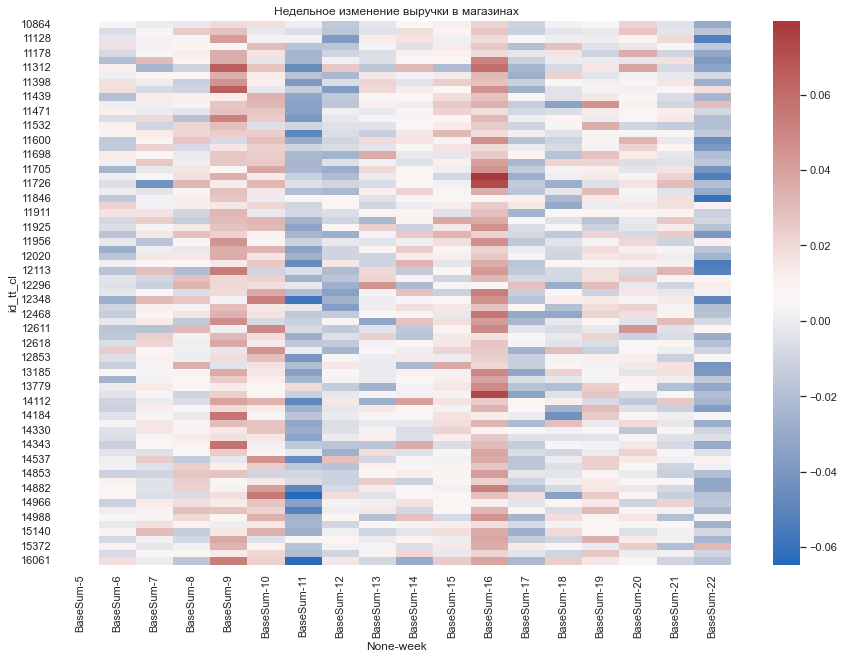

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_pivot_table, cmap='vlag')
plt.title('Недельное изменение выручки в магазинах');

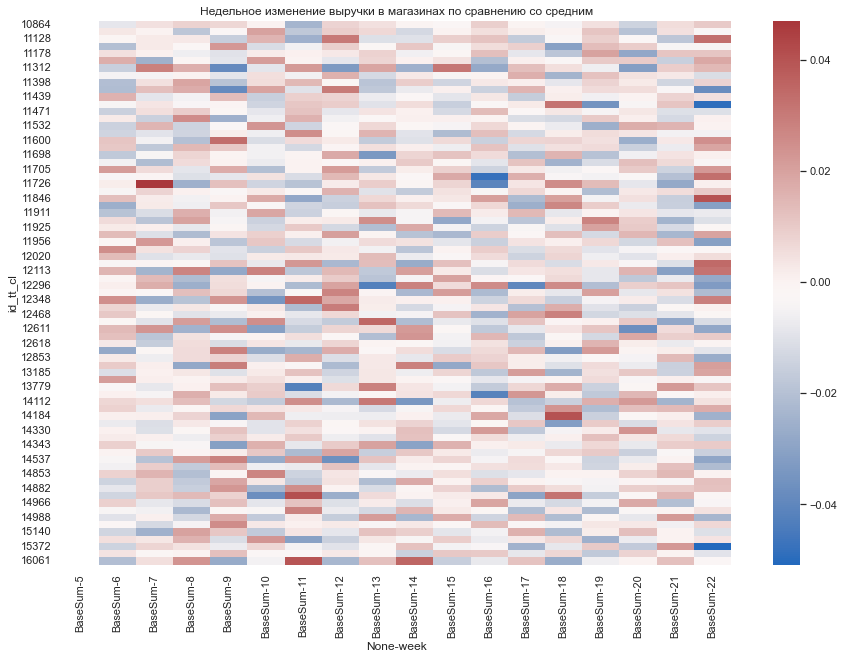

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_pivot_table_3, cmap='vlag')
plt.title('Недельное изменение выручки в магазинах по сравнению со средним');

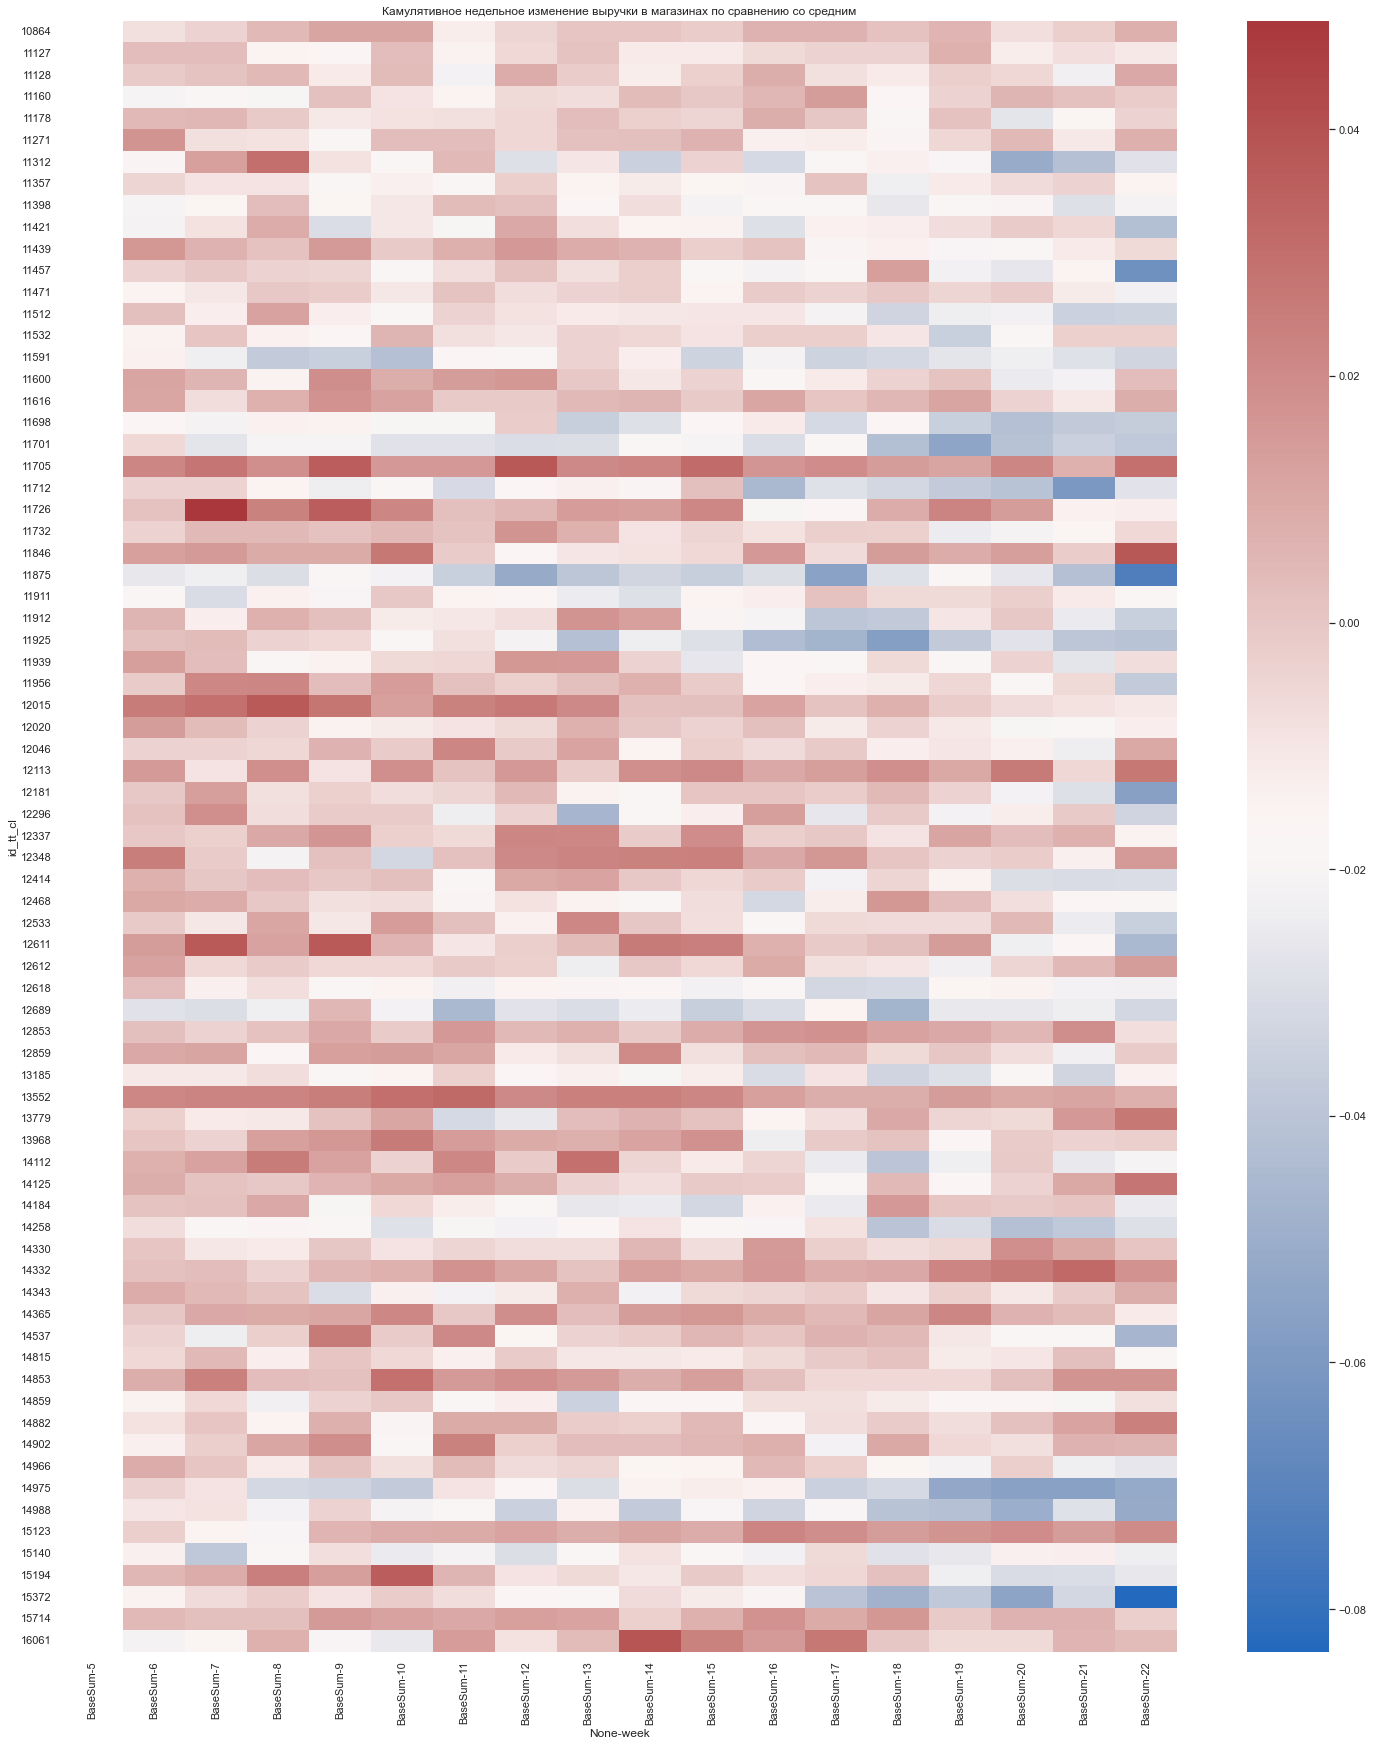

In [22]:
plt.figure(figsize=(25, 30))
sns.heatmap(df_pivot_table_4, cmap='vlag')
plt.title('Камулятивное недельное изменение выручки в магазинах по сравнению со средним');

In [23]:
df_category = df_left.groupby(['id_group','name_gr','id_group2','name_gr2','name_tov','id_tov']).agg({'date_tt':['count']})
df_category = df_category.reset_index()
df_category.head()

,id_group,name_gr,id_group2,name_gr2,name_tov,id_tov,date_tt
,,,,,,,count
0,11,Прочее,100,ХозТовары,"WMF Очиститель молочной системы, 1000мл",25000,2
1,11,Прочее,100,ХозТовары,WMF Спец. таблетки для очистки кофе-машин (100шт),25001,4
2,11,Прочее,100,ХозТовары,Антисептик - Гель 5 Литров САНИТАЙЗЕР Расходник,36304,2
3,11,Прочее,100,ХозТовары,Бумага А4 Расходник,1640,17
4,11,Прочее,100,ХозТовары,Бумажный крафт-стакан 250 мл ВкусВилл,21422,560


In [24]:
df_checks_short = df_checks[['id_tt_cl','id_tov_cl','Quantity','date_ch','BaseSum']].copy()


In [25]:
df_checks_short['BaseSum'] = df_checks_short['BaseSum'].round(decimals = 2)
df_checks_short.head(20)

,id_tt_cl,id_tov_cl,Quantity,date_ch,BaseSum
0,10864,20698,1.0,2022-02-19,152.73
1,10864,20738,1.0,2022-02-19,141.00
2,10864,20738,1.0,2022-02-19,195.83
3,10864,20741,1.0,2022-02-19,72.46
4,10864,20743,1.0,2022-02-19,90.77
5,10864,20744,1.0,2022-02-19,145.45
6,10864,20744,1.0,2022-02-19,145.45
7,10864,20750,1.0,2022-02-19,179.13
8,10864,20813,2.0,2022-02-19,272.73
9,10864,20834,1.0,2022-02-19,103.33


In [26]:
df_category = df_left.groupby(['id_group','name_gr','id_group2','name_gr2','id_tov','name_tov']).agg({'date_tt':['count']})
df_category = df_category.reset_index()
df_category.head()

,id_group,name_gr,id_group2,name_gr2,id_tov,name_tov,date_tt
,,,,,,,count
0,11,Прочее,100,ХозТовары,942,Комус Ёмкость РК-19,6
1,11,Прочее,100,ХозТовары,1260,Кассовая лента ВкусВилл (широкая),26
2,11,Прочее,100,ХозТовары,1269,Зубочистки (1000шт),2
3,11,Прочее,100,ХозТовары,1271,Стаканчики (100шт),3
4,11,Прочее,100,ХозТовары,1272,Скотч,5


In [4]:
df_checks_short2 = pd.merge(df_checks_short,df_category[['name_gr','id_tov']],left_on='id_tov_cl',right_on='id_tov',how = 'left')

NameError: name 'df_checks_short' is not defined

In [ ]:
df_checks_short2.head()

,id_tt_cl,id_tov_cl,Quantity,date_ch,BaseSum,"(id_group, )","(name_gr, )","(id_group2, )","(name_gr2, )","(id_tov, )","(name_tov, )","(date_tt, count)"
0,10864,20698,1.0,2022-02-19,152.73,33,Молочная Продукция,10855,Творог классика,20698,"Творог ""Пластовой"" из цельного молока",5152
1,10864,20698,1.0,2022-02-19,190.91,33,Молочная Продукция,10855,Творог классика,20698,"Творог ""Пластовой"" из цельного молока",5152
2,10864,20698,1.0,2022-02-19,190.91,33,Молочная Продукция,10855,Творог классика,20698,"Творог ""Пластовой"" из цельного молока",5152
3,10864,20698,2.0,2022-02-19,274.91,33,Молочная Продукция,10855,Творог классика,20698,"Творог ""Пластовой"" из цельного молока",5152
4,10864,20698,1.0,2022-02-19,185.18,33,Молочная Продукция,10855,Творог классика,20698,"Творог ""Пластовой"" из цельного молока",5152


In [ ]:
type(df_category)

method

In [ ]:
df_category.to_excel('fileName.xlsx')

In [ ]:
df_left[df_left['name_tov'] == "Говядина в соусе с черносливом и гречкой Айс"]